# Basic Probability Calculations

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Function that gives 2D distribution

In [225]:
def custom_2d_distribution(x, y):
    X, Y = np.meshgrid(x, y)
    Z = np.sin(10*X) * np.cos(10*Y) + 0.5 * np.sin(10*X) * np.sin(10*Y)
    '''
    # Apply Hann window along x-axis
    hann_x = np.hanning(len(x))
    hann_y = np.hanning(len(y))
    window = np.outer(hann_x, hann_y)
    
    # Apply the window to the distribution
    Z *= window
    '''
    # Ensure the distribution is always positive
    Z[Z < 0] = 0
    
    return X, Y, Z

## Prior box

In [226]:
def define_prior_box(x, y, box_x, box_y):
    X, Y = np.meshgrid(x, y)
    prior_box = (X >= box_x[0]) & (X <= box_x[1]) & (Y >= box_y[0]) & (Y <= box_y[1])
    return prior_box

## Sampling of the reference probability on a 2D regular grid in the prior box

In [227]:
def sample_distribution_within_prior_box(Z, prior_box):
    Z_prior_box = Z[prior_box]
    return Z_prior_box

# Define the range for x and y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Define the prior box coordinates
box_x = (-0.5, 0.5)
box_y = (-0.5, 0.5)

## Normalization

In [228]:
# Normalize the PDF within the prior box
Z_prior_box_normalized = Z_prior_box / np.sum(Z_prior_box)

## Plot

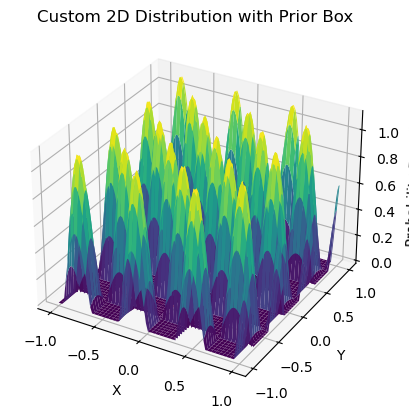

Sampled values within the prior box:
[0.70073196 0.72045779 0.71088005 ... 0.24762948 0.25096581 0.24409447]
Sampled values within the prior box after normalization:
[0.00122003 0.00125437 0.0012377  ... 0.00043114 0.00043695 0.00042499]


'\n# Print the sum of the normalized values within the prior box\nprint("Sum of normalized values within the prior box:", np.sum(Z_prior_box_normalized))\n'

In [229]:
# Calculate the 2D distribution
X, Y, Z = custom_2d_distribution(x, y)

# Define the prior box
prior_box = define_prior_box(x, y, box_x, box_y)

# Sample the distribution within the prior box
Z_prior_box = sample_distribution_within_prior_box(Z, prior_box)

# Plot the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# Plot the prior box
ax.plot([box_x[0], box_x[0], box_x[1], box_x[1], box_x[0]], 
        [box_y[0], box_y[1], box_y[1], box_y[0], box_y[0]], 
        zs=0, color='r', linestyle='--', alpha=0.5)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('Custom 2D Distribution with Prior Box')

plt.show()

# Print sampled values within the prior box
print("Sampled values within the prior box:")
print(Z_prior_box)

# Print sampled values within the prior box after normalization
print("Sampled values within the prior box after normalization:")
print(Z_prior_box_normalized)

'''
# Print the sum of the normalized values within the prior box
print("Sum of normalized values within the prior box:", np.sum(Z_prior_box_normalized))
'''

## Contour plot the distribution

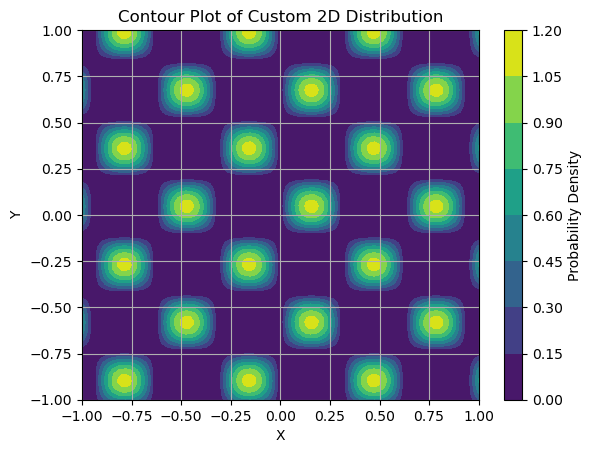

In [230]:
# Step 1: Calculate the 2D distribution
X, Y, Z = custom_2d_distribution(x, y)

# Step 2: Create a contour plot
plt.contourf(X, Y, Z, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Custom 2D Distribution')
plt.colorbar(label='Probability Density')
plt.grid(True)
plt.show()

## Marginalization of the distribution
**-> two 1D distributions**

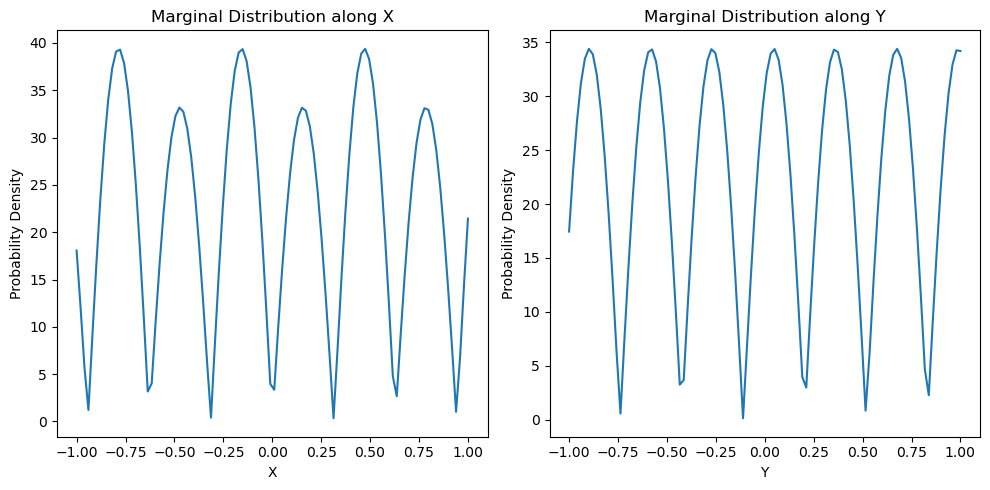

In [231]:
# Marginalize the distribution to obtain 1D distributions
Z_marginal_x = np.sum(Z, axis=0)
Z_marginal_y = np.sum(Z, axis=1)

# Plot the marginalized distributions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, Z_marginal_x)
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along X')

plt.subplot(1, 2, 2)
plt.plot(y, Z_marginal_y)
plt.xlabel('Y')
plt.ylabel('Probability Density')
plt.title('Marginal Distribution along Y')

plt.tight_layout()
plt.show()


**Checking that marginalization does not alter the normalization of the pdf**

In [232]:
# Marginalize the distribution to obtain 1D distributions
Z_marginal_x = np.sum(Z, axis=0)
Z_marginal_y = np.sum(Z, axis=1)

# Check normalization of the marginalized distributions
sum_marginal_x = np.sum(Z_marginal_x)
sum_marginal_y = np.sum(Z_marginal_y)

# Print the sum of values in the marginalized distributions
print("Sum of values in the marginalized distribution along X:", sum_marginal_x)
print("Sum of values in the marginalized distribution along Y:", sum_marginal_y)

Sum of values in the marginalized distribution along X: 2234.1849178445436
Sum of values in the marginalized distribution along Y: 2234.1849178445436


## Cumulative distribution function of the 1D distribution